In [43]:
import json
import sys
import os
from matplotlib import pyplot as plt
from skimage import io
import requests as r
from bs4 import BeautifulSoup

In [23]:
raw = io.imread('sprites.png')
raw.ndim

3

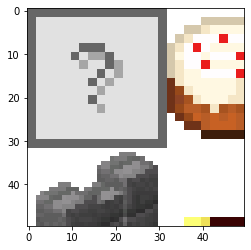

In [37]:
plt.imshow(raw[:50, :50, :])

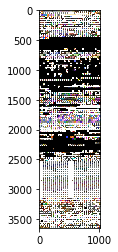

In [31]:
plt.imshow(io.imread('sprites.png')[:][:][:])

In [90]:
req = r.get('https://minecraft.gamepedia.com/Axe#')

In [91]:
# On load, scrape items used in recipe (first seen, not all of the options)
soup = BeautifulSoup(req.content, 'html.parser')
recipe_hrefs = []
for item in soup.find('span', {'class': 'mcui mcui-Crafting_Table pixel-image'}).find_all('span', {'class': 'invslot'})[:9]:
    block = item.find('a')
    if block is None:
        print('No block')
        recipe_hrefs.append('None')
    else:
        print(block.get('href'))
        recipe_hrefs.append(block.get('href'))

/Oak_Planks
/Oak_Planks
No block
/Oak_Planks
/Stick
No block
No block
/Stick
No block


In [92]:
# For each href, get item picture
i = 0
for href in recipe_hrefs:
    if href == 'None':
        print('{:20s}'.format('X'), end=' ')
    else:
        print('{:20s}'.format(href[1:]), end=' ')
    if i == 2:
        print('\n', end='')
        i = 0
    else:
        i += 1

Oak_Planks           Oak_Planks           X                    
Oak_Planks           Stick                X                    
X                    Stick                X                    


In [93]:
test = '{:20s}'.format("Testing")
test

'Testing             '